<a href="https://colab.research.google.com/github/saishshinde15/NLP/blob/main/Sentiment_Analysis_TfidVec_Experiment_Binary_vs_NonBinary_Converstion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [6]:
dataset=pd.read_csv('data.csv')

In [7]:
dataset

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


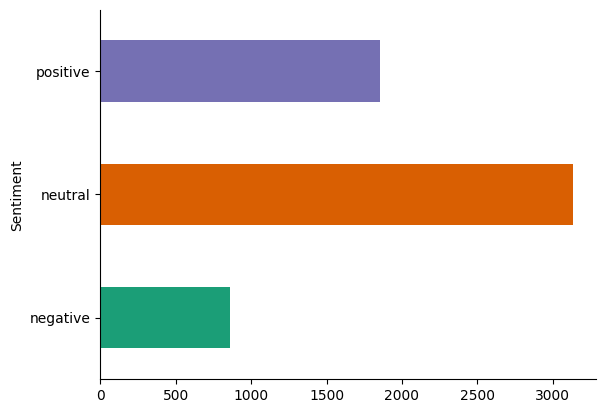

In [9]:
# @title Sentiment

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
dataset.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [10]:
dataset

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [11]:
X=dataset.iloc[:,0]

In [12]:
X

0       The GeoSolutions technology will leverage Bene...
1       $ESI on lows, down $1.50 to $2.50 BK a real po...
2       For the last quarter of 2010 , Componenta 's n...
3       According to the Finnish-Russian Chamber of Co...
4       The Swedish buyout firm has sold its remaining...
                              ...                        
5837    RISING costs have forced packaging producer Hu...
5838    Nordic Walking was first used as a summer trai...
5839    According shipping company Viking Line , the E...
5840    In the building and home improvement trade , s...
5841    HELSINKI AFX - KCI Konecranes said it has won ...
Name: Sentence, Length: 5842, dtype: object

In [13]:
y=dataset['Sentiment']

In [14]:
y

0       positive
1       negative
2       positive
3        neutral
4        neutral
          ...   
5837    negative
5838     neutral
5839     neutral
5840     neutral
5841    positive
Name: Sentiment, Length: 5842, dtype: object

Experiment1-Not converting into binary (label encoder)

In [16]:
X_train_input,X_test_input,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [17]:
len(X_train_input)

4673

In [18]:
len(y_train)

4673

In [19]:
vectorizer=TfidfVectorizer(max_features=2000)

In [20]:
X_train=vectorizer.fit_transform(X_train_input)
X_test=vectorizer.transform(X_test_input)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr=LogisticRegression()

In [23]:
lr.fit(X_train,y_train)

LogisticRegression()

In [46]:
lr_model_test=lr.score(X_test,y_test)

In [47]:
lr_model_train=lr.score(X_train,y_train)

In [50]:
model_result=(['Lr Non-binary',lr_model_test,lr_model_train])

In [51]:
model_result

['Lr Non-binary', 0.7014542343883661, 0.8155360582067195]

In [30]:
y_lr=lr.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test ,y_lr)
cm

array([[ 25, 112,  32],
       [ 28, 544,  37],
       [  6, 134, 251]])

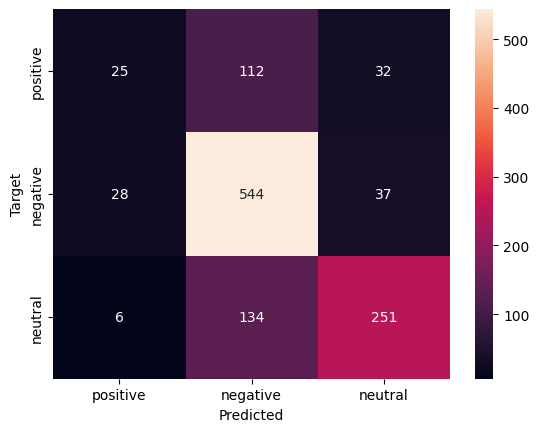

In [34]:
def plot_cm(cm):
  classes = ['positive', 'negative','neutral']    #0=postivie,1=negative,2=neutal
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

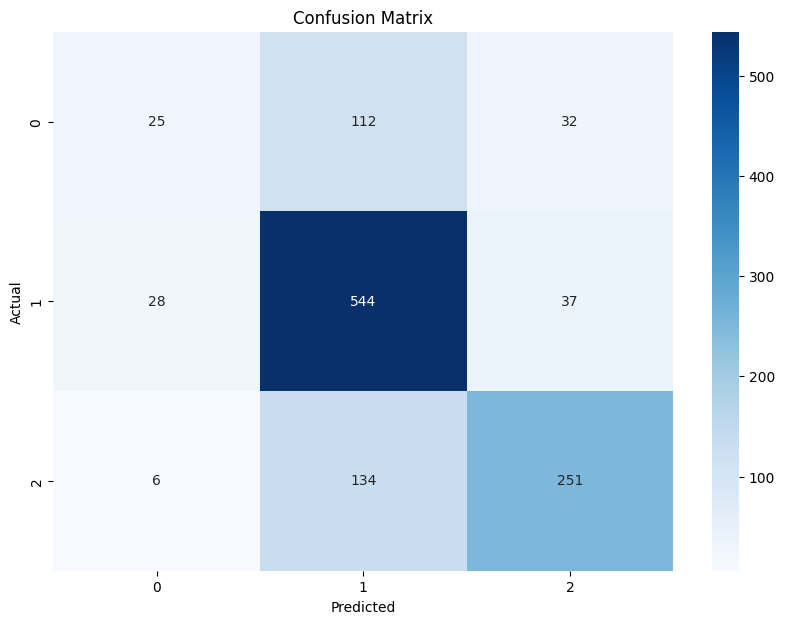

In [36]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_lr), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [38]:
#classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_lr))


              precision    recall  f1-score   support

    negative       0.42      0.15      0.22       169
     neutral       0.69      0.89      0.78       609
    positive       0.78      0.64      0.71       391

    accuracy                           0.70      1169
   macro avg       0.63      0.56      0.57      1169
weighted avg       0.68      0.70      0.67      1169



In [ ]:
#vectorizer=TfidfVectorizer(required parameter)

In [88]:
#X_train=vectorizer.fit_transform(X_train_input)
#X_test=vectorizer.transform(X_test_input)

In [39]:
from sklearn.naive_bayes import MultinomialNB

In [40]:
nb=MultinomialNB()

In [41]:
nb.fit(X_train,y_train)

MultinomialNB()

In [52]:
nb_model_test=nb.score(X_test,y_test)

In [45]:
nb_model_train=nb.score(X_train,y_train)

In [53]:
model_result=(['Lr Non-binary',lr_model_test,lr_model_train],
              ['Nb Non-Binary',nb_model_test,nb_model_train])

In [54]:
model_result

(['Lr Non-binary', 0.7014542343883661, 0.8155360582067195],
 ['Nb Non-Binary', 0.6928999144568007, 0.7547613952493045])

In [56]:
y_nb=nb.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test ,y_nb)
cm

array([[ 14, 113,  42],
       [  8, 575,  26],
       [  1, 169, 221]])

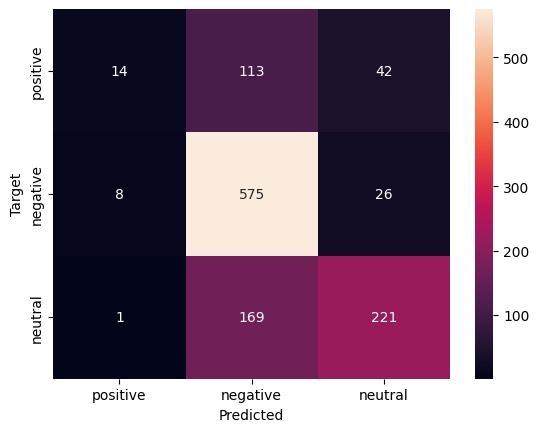

In [58]:
def plot_cm(cm):
  classes = ['positive', 'negative','neutral']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_lr))


              precision    recall  f1-score   support

    negative       0.42      0.15      0.22       169
     neutral       0.69      0.89      0.78       609
    positive       0.78      0.64      0.71       391

    accuracy                           0.70      1169
   macro avg       0.63      0.56      0.57      1169
weighted avg       0.68      0.70      0.67      1169



## Converting y into binary using label encoder

In [60]:
X

0       The GeoSolutions technology will leverage Bene...
1       $ESI on lows, down $1.50 to $2.50 BK a real po...
2       For the last quarter of 2010 , Componenta 's n...
3       According to the Finnish-Russian Chamber of Co...
4       The Swedish buyout firm has sold its remaining...
                              ...                        
5837    RISING costs have forced packaging producer Hu...
5838    Nordic Walking was first used as a summer trai...
5839    According shipping company Viking Line , the E...
5840    In the building and home improvement trade , s...
5841    HELSINKI AFX - KCI Konecranes said it has won ...
Name: Sentence, Length: 5842, dtype: object

In [61]:
y

0       positive
1       negative
2       positive
3        neutral
4        neutral
          ...   
5837    negative
5838     neutral
5839     neutral
5840     neutral
5841    positive
Name: Sentiment, Length: 5842, dtype: object

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [63]:
y

array([2, 0, 2, ..., 1, 1, 2])

In [65]:
X_train_bin,X_test_bin,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [66]:
len(X_train_bin)

4673

In [67]:
len(y_train)

4673

In [68]:
vectorizer=TfidfVectorizer(max_features=2000)

In [69]:
X_train=vectorizer.fit_transform(X_train_bin)
X_test=vectorizer.transform(X_test_bin)

In [70]:
from sklearn.linear_model import LogisticRegression

In [72]:
lr1=LogisticRegression()

In [73]:
lr1.fit(X_train,y_train)

LogisticRegression()

In [76]:
lr_model_binary_test=lr1.score(X_test,y_test)

In [77]:
lr_model_binary_train=lr1.score(X_train,y_train)

In [78]:
model_result=(['Lr Non-binary',lr_model_test,lr_model_train],
              ['Nb Non-Binary',nb_model_test,nb_model_train],
              ['Lr Binary',lr_model_binary_test,lr_model_binary_train])

In [79]:
model_result

(['Lr Non-binary', 0.7014542343883661, 0.8155360582067195],
 ['Nb Non-Binary', 0.6928999144568007, 0.7547613952493045],
 ['Lr Binary', 0.69803250641574, 0.8187459875882731])

In [80]:
y_lr1=lr1.predict(X_test)

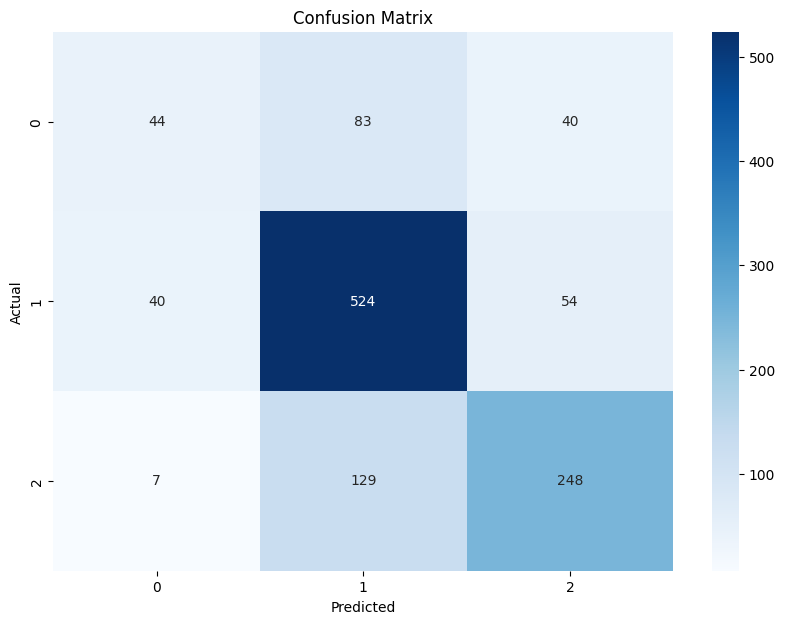

In [82]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_lr1), annot=True, fmt='d', cmap='Blues'). #0=negative,1=neutral,2=postive
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [84]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_lr1))

              precision    recall  f1-score   support

           0       0.48      0.26      0.34       167
           1       0.71      0.85      0.77       618
           2       0.73      0.65      0.68       384

    accuracy                           0.70      1169
   macro avg       0.64      0.59      0.60      1169
weighted avg       0.68      0.70      0.68      1169



In [ ]:
#vectorizer=TfidfVectorizer(required parameter)

In [ ]:
#X_train=vectorizer.fit_transform(X_train_input)
#X_test=vectorizer.transform(X_test_input)

In [86]:
nb1=MultinomialNB()

In [87]:
nb1.fit(X_train,y_train)

MultinomialNB()

In [89]:
nb_model_binary_test=nb1.score(X_test,y_test)

In [92]:
nb_model_binary_train=nb1.score(X_train,y_train)

In [93]:
model_result=(['Lr Non-binary',lr_model_test,lr_model_train],
              ['Nb Non-Binary',nb_model_test,nb_model_train],
              ['Lr Binary',lr_model_binary_test,lr_model_binary_train],
              ['Nb Binary',nb_model_binary_test,nb_model_binary_train])

In [94]:
model_result

(['Lr Non-binary', 0.7014542343883661, 0.8155360582067195],
 ['Nb Non-Binary', 0.6928999144568007, 0.7547613952493045],
 ['Lr Binary', 0.69803250641574, 0.8187459875882731],
 ['Nb Binary', 0.6817792985457656, 0.7543334046650974])

In [ ]:
## We can keep y as binary as well as normal ,there is minimum differnece in this case but it might change accordingly to dataset